In [2]:
%pylab ipympl 

from nugridpy import mesa as ms
from nugridpy import nugridse as nuse
from nugridpy import utils as ut

from matplotlib.gridspec import GridSpec as gs

Populating the interactive namespace from numpy and matplotlib


In the following paper
<blockquote>Ritter, C., F. Herwig, S. Jones, M. Pignatari, C. Fryer, and R. Hirschi. “NuGrid Stellar Data Set - II. Stellar Yields from H to Bi for Stellar Models with MZAMS = 1-25 M⊙ and Z = 0.0001-0.02.” Monthly Notices of the Royal Astronomical Society 480 (October 1, 2018): 538–71. https://doi.org/10.1093/mnras/sty1729.</blockquote>

they claim that 
<blockquote>During Si shell burning convective O-C shell mergers occur in the massive star models with $M_{\mathrm{ZAMS}}/M_\odot = 12, 15, 20$ at $Z = 0.01$ and $M_{\mathrm{ZAMS}} = 15 M_\odot$ at $Z = 0.02$. In these models, the convective O shell increases in mass and touches the C-shell. C-shell material is mixed into the O shell until both convective shells fully merge. Burning of the ingested Ne results in large overproduction factors of the odd-Z elements P, Cl, K, and Sc in Fig. 21 (Ritter et al. 2017a).</blockquote>

Additionally, in 
<blockquote>Ritter, C., R. Andrassy, B. Côté, F. Herwig, P. R. Woodward, M. Pignatari, and S. Jones. “Convective-Reactive Nucleosynthesis of K, Sc, Cl and p-Process Isotopes in O-C Shell Mergers.” Monthly Notices of the Royal Astronomical Society 474 (February 1, 2018): L1–6. https://doi.org/10.1093/mnrasl/slx126.</blockquote>

it is claimed that
<blockquote>The 1D stellar model M15Z0.02 experiences an O–C shell merger about 4 min after the end of convective Si core burning. After an initial partial mixing phase both convective shells merge, and large amounts of $^{35}$Cl, $^{39}$K and $^{45}$Sc are produced.</blockquote>

These same models are available to us below.

In [3]:
stars = {
         'M15Z02': {'mesa_dir': "/data/nugrid/data/set1ext/set1.2/see_wind/M15.0Z2.0e-02/LOGS",
                    'mppnp_dir': "/data/nugrid/data/set1ext/set1.2/ppd_wind/M15.0Z2.0e-02/H5_out"},

         'M12Z01': {'mesa_dir': "/data/nugrid/data/set1ext/set1.1/see_wind/M12.0Z1.0e-02/LOGS",
                    'mppnp_dir': "/data/nugrid/data/set1ext/set1.1/ppd_wind/M12.0Z1.0e-02/H5_out"},
         'M15Z01': {'mesa_dir': "/data/nugrid/data/set1ext/set1.1/see_wind/M15.0Z1.0e-02/LOGS",
                    'mppnp_dir': "/data/nugrid/data/set1ext/set1.1/ppd_wind/M15.0Z1.0e-02/H5_out"},
         'M20Z01': {'mesa_dir': "/data/nugrid/data/set1ext/set1.1/see_wind/M20.0Z1.0e-02/LOGS",
                    'mppnp_dir': "/data/nugrid/data/set1ext/set1.1/ppd_wind/M20.0Z1.0e-02/H5_out"}
        }

star_keys = stars.keys()

In [4]:
for star in star_keys:
    stars[star]['mesa']   = ms.star_log(stars[star]['mesa_dir'])
    stars[star]['nugrid'] = nuse.se(stars[star]['mppnp_dir'])

Using old star.logsa file ...
 reading ...100% 

Searching files, please wait.......
Reading preprocessor files
File search complete.
Using old star.logsa file ...
 reading ...100% 

Searching files, please wait.......
Reading preprocessor files
File search complete.
Using old star.logsa file ...
 reading ...100% 

Searching files, please wait.......
Reading preprocessor files
File search complete.
Using old star.logsa file ...
 reading ...100% 

Searching files, please wait.......
Reading preprocessor files
File search complete.


In [5]:
def plotting(key, cycle, ifig, mass_range):

    pt   = stars[key]['nugrid']
    prof = ms.mesa_profile(stars[key]['mesa_dir'], num=cycle)
    
    params = ['mass', 'dcoeff', 'C-12', 'O-16', 'Ne-20', 'Si-28', 'P-31', 'Cl-35', 'K-39', 'Sc-45', 'Mg-24', 'S-32', 'radius']
    loaded = {param: pt.get(cycle, param) for param in params}

    close(ifig)

    fig = plt.figure(num=ifig)
    fig.suptitle(f'cycle {cycle}')
    gs = fig.add_gridspec(2, 2, height_ratios=[1, 0.4])

    ax0 = fig.add_subplot(gs[0, 0])
    ax1 = fig.add_subplot(gs[0, 1], sharex=ax0)
    ax2 = fig.add_subplot(gs[1, :], sharex=ax0)
    
    ax0.set_xlim(mass_range[0], mass_range[1])
    ax0.set_ylabel(r'$X$ (mass fraction)')
    ax2.set_xlabel(r'$m/M_\odot$')
    
    i = np.argmin(np.abs(1.55-loaded['mass']))
    k = np.argmin(np.abs(1.78-loaded['mass']))
    q = np.argmin(np.abs(1.955-loaded['mass']))
    j = np.argmin(np.abs(2.1-loaded['mass']))
    
    oshell = round((loaded['radius'][k] - loaded['radius'][i])*700*50,)
    intershell = round((loaded['radius'][q] - loaded['radius'][k])*700*50,)
    cshell = round((loaded['radius'][j] - loaded['radius'][q])*700*50,)
    print("\nAssuming a 896^3 grid with 9 Mm radius")
    print(f"O-shell: {oshell} cells\nInter-shell: {intershell} cells\nC-shell: {cshell} cells")

    # the main isotopes   
    for c, iso in enumerate(['C-12', 'O-16', 'Ne-20', 'Si-28'], 0):
        ax0.semilogy(loaded['mass'], loaded[iso], color=ut.linestylecb(c)[2], linestyle=ut.linestylecb(c)[0], label=iso)
        
    ax0.set_ylim(1e-4, 1.5)
    ax0.legend(loc='lower right', ncol=2, fontsize='xx-small')

    # the odd-Z isotopes
    for c, iso in enumerate(['P-31', 'Cl-35', 'K-39', 'Sc-45'], 4): 
        ax1.semilogy(loaded['mass'], loaded[iso], color=ut.linestylecb(c)[2], linestyle=ut.linestylecb(c)[0], label=iso)

    ax1.set_ylim(1e-9, 1.5)
    ax1.legend(loc='lower right', ncol=2, fontsize='xx-small')

    # stellar structure
    ax2.semilogy(loaded['mass'], loaded['dcoeff'], linestyle='dotted', color='black', label=r'$D_{\mathrm{mix}}$')
    
    mmass, meps_si = prof.get('mass'), prof.get('burn_si')
    ax2.semilogy(mmass, meps_si, linestyle='dotted', color='red', label=r'$\epsilon_{\mathrm{Si}}$')
    ax2.legend(loc='upper left', ncol=2, fontsize='xx-small')
    ax2.set_ylim(1e8, 1e25)

#### What do we see in the actual models? 

Well, before the merger we can see in the $D_{\mathrm{mix}}$ coefficient that there are separated convective zones and a steep drop-off of C and Ne at some mass coordinate. Then, as the merger occurs, we see a single convective zone emerge that brings C and Ne deeper into the star and a production of the odd-Z isotopes that matches the mass coordinates of the convective zone. After the merger is finished and the convective zones split, there is slight production of the odd-Z elements, but the mass fraction of all the isotopes is fairly frozen.

### $M_{\mathrm{ZAMS}} = 15 M_\odot$ and $Z = 0.02$

 creating color map burn ...100% 

 creating color map mix ...100% 

engenstyle was  full
mixstyle was  full

 finished preparing color map
plot versus time left
plotting contours


/usr/local/lib/python3.6/dist-packages/nugridpy/mesa.py:2509: UserWarning: Log scale: values of z <= 0 have been masked
  locator=matplotlib.ticker.LogLocator())
/usr/local/lib/python3.6/dist-packages/nugridpy/mesa.py:2512: UserWarning: Log scale: values of z <= 0 have been masked
  locator=matplotlib.ticker.LogLocator())


plotting patches


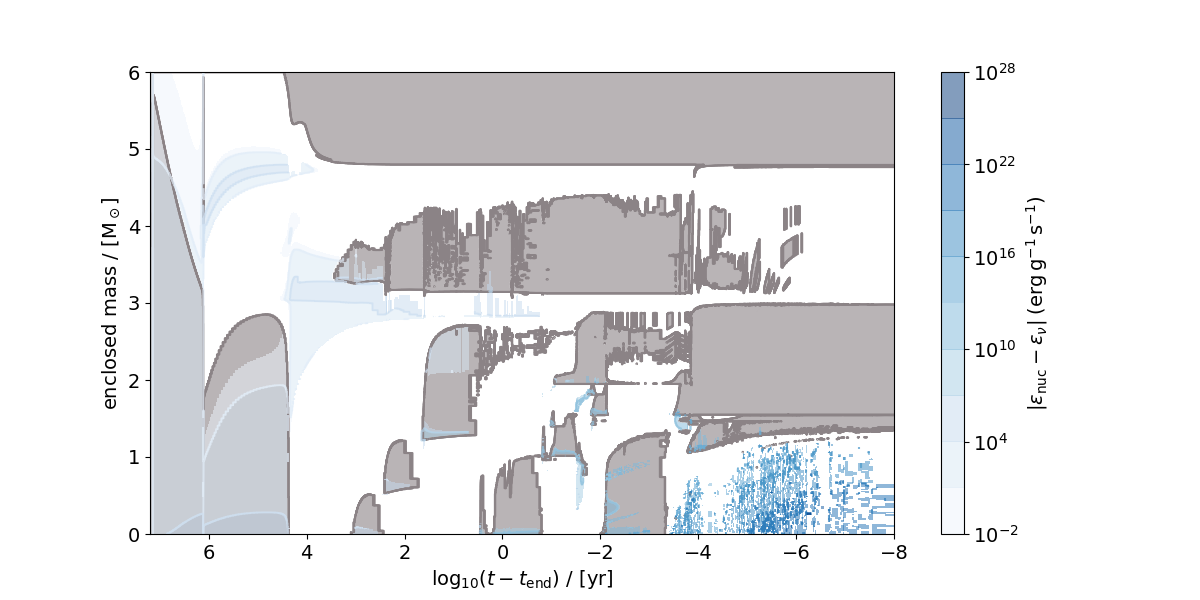

In [44]:
ifig=3;plt.close(ifig);plt.figure(ifig, figsize=(12,6))
stars['M15Z02']['mesa'].kip_cont(ifig, ylims=[0,6], ixaxis='log_time_left', xlims=[7.2,-8], boundaries=False, xres=5000, yres=5000)

plt.text(6.8, 0.5, "H", fontsize=16)
plt.text(5.2, 4.8, "H", fontsize=16)
plt.text(5.4, 0.5, "He", fontsize=16)
plt.text(3.5, 2.9, "He", fontsize=16)
plt.text(2.3, 1.5, "C", fontsize=16)

plt.text(0.8, 0.1, "Ne", fontsize=16)
plt.text(-0.2, 0.1, "O", fontsize=16)
plt.text(-1.6, 1.2, "O", fontsize=16)
plt.text(-2.5, 0.1, "Si", fontsize=16)
plt.text(-4.1, 0.1, "Fe", fontsize=16)

for artist in plt.gca().get_children():
    if isinstance(artist, (plt.Line2D, PatchCollection, PolyCollection)):
        artist.set_rasterized(True)

plt.tight_layout()
plt.savefig("massive_star_kipp.pdf", format="pdf", bbox_inches="tight", dpi=300)

In [53]:
prof.cols

{'zone': 1,
 'logT': 2,
 'logRho': 3,
 'logP': 4,
 'logR': 5,
 'luminosity': 6,
 'eps_grav': 7,
 'signed_log_eps_grav': 8,
 'net_nuclear_energy': 9,
 'net_energy': 10,
 'logL': 11,
 'log_Ledd': 12,
 'log_L_div_Ledd': 13,
 'signed_log_power': 14,
 'velocity': 15,
 'entropy': 16,
 'mixing_type': 17,
 'csound': 18,
 'v_div_csound': 19,
 'binding_energy': 20,
 'binding_energy_integral': 21,
 'eta': 22,
 'mu': 23,
 'logdq': 24,
 'dq_ratio': 25,
 'q': 26,
 'radius': 27,
 'rmid': 28,
 'temperature': 29,
 'tau': 30,
 'logtau': 31,
 'pressure': 32,
 'pgas_div_ptotal': 33,
 'logPgas': 34,
 'energy': 35,
 'grada': 36,
 'free_e': 37,
 'abar': 38,
 'ye': 39,
 'log_opacity': 40,
 'eps_nuc': 41,
 'non_nuc_neu': 42,
 'mlt_mixing_length': 43,
 'mlt_mixing_type': 44,
 'gradT_sub_grada': 45,
 'log_D_mix': 46,
 'log_conv_vel': 47,
 'conv_vel_div_csound': 48,
 'log_mlt_D_mix': 49,
 'pressure_scale_height': 50,
 'gradT': 51,
 'gradr': 52,
 'dlnd_dt': 53,
 'dlnT_dt': 54,
 'signed_dlnd': 55,
 'signed_dlnT': 5

 creating color map burn ...100% 

 creating color map mix ...100% 

engenstyle was  full
mixstyle was  full

 finished preparing color map
plot versus model number
plotting contours


/usr/local/lib/python3.6/dist-packages/nugridpy/mesa.py:2509: UserWarning: Log scale: values of z <= 0 have been masked
  locator=matplotlib.ticker.LogLocator())
/usr/local/lib/python3.6/dist-packages/nugridpy/mesa.py:2512: UserWarning: Log scale: values of z <= 0 have been masked
  locator=matplotlib.ticker.LogLocator())


plotting patches
plotting abund boundaries


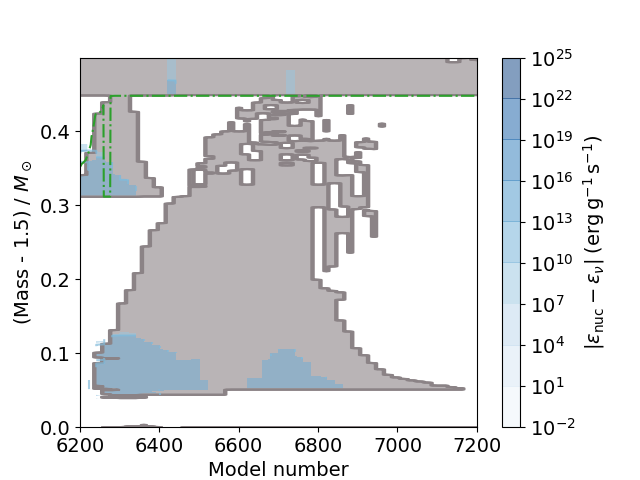

In [6]:
ifig=2;plt.close(ifig);plt.figure(ifig)
stars['M15Z02']['mesa'].kip_cont(ifig, ylims=[1.5,2], xlims=[6200, 7200],boundaries=True)


NameError: name 'pt' is not defined

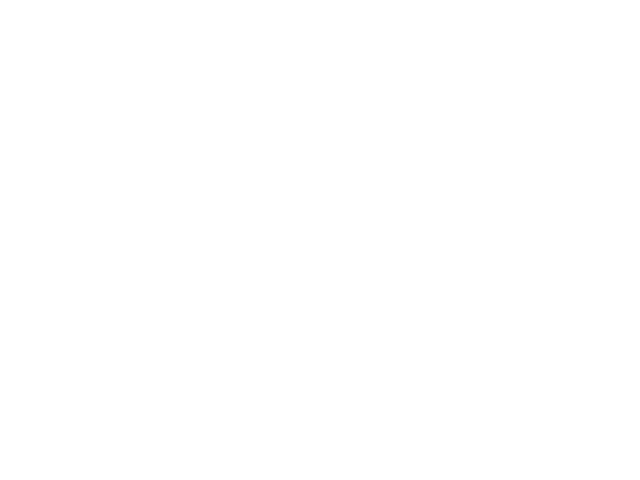

In [7]:
ifig=1;plt.close(ifig);plt.figure(ifig)

cycles = [6000, 6200,6500, 6900, 7000]

for cycle in cycles:
    mass = pt.get(cycle, "mass")
    Xi   = pt.get(cycle, "Se-74")
    
    plt.semilogy(mass, Xi, label=cycle)
    
plt.ylim(1e-17, 1e-5)
plt.xlim(1.55, 2.1)
plt.legend(ncol=10, loc="lower center", fontsize="small")

In [74]:
pnuclei = ['Se-74', 'Kr-78', 'Sr-84', 'Mo-92', 'Mo-94', 'Ru-96', 'Ru-98', 'Pd-102', 'Cd-106', 'Cd-108',
           'In-113', 'Sn-112', 'Sn-114', 'Sn-115', 'Te-120', 'Xe-124', 'Xe-126', 'Ba-130', 'Ba-132',
           'La-138', 'Ce-136', 'Ce-138', 'Sm-144', 'Gd-152', 'Dy-156', 'Dy-158', 'Er-162', 'Er-164', 'Yb-168', 'Hf-174', 
           'Ta-180', 'W-180', 'Os-184', 'Pt-190', 'Hg-196']

In [11]:
import pandas as pd
def readdat(datpath):
    
    isotopes, massfracs = [], []

    with open(datpath, 'r') as f:

        for line in f:
            if not line.startswith("D"): continue

            _, element, A, massfrac = line.split()

            isotope = element[0] + element[1:].lower() + '-' + str(A)

            isotopes.append(isotope)
            massfracs.append(float(massfrac))
    
    return pd.DataFrame({"Isotope": isotopes, "X": massfracs})

In [8]:
cycle = 9160

pt = stars["M15Z02"]['nugrid']
pt.abund_at_masscoordinate(cycle, 1.8)

 reading ['rho']...100%]...100%iso_massf
 reading ['iso_massf']...100%

In [9]:
def getX(frame, isotopes_of_interest): return frame.loc[frame.Isotope.isin(isotopes_of_interest), 'X'].to_numpy()

In [12]:
Oini = readdat("massf_1.8.dat")
Cini = readdat("massf_2.0.dat")

In [93]:
getX(Oini, pnuclei)

array([3.03161598e-07, 2.00927472e-07, 1.26376893e-07, 5.68788225e-12,
       2.86249865e-13, 1.30927791e-12, 9.12526322e-13, 2.57289736e-12,
       3.12817027e-12, 7.24481875e-13, 9.90171159e-15, 3.53021579e-12,
       1.31144330e-12, 5.50245047e-15, 1.52957543e-13, 8.04232910e-13,
       2.57786637e-13, 8.21690167e-13, 5.40698411e-13, 3.16515249e-16,
       1.00751858e-13, 1.22771856e-13, 1.34703110e-12, 6.80129612e-16,
       2.14802802e-14, 6.86073949e-15, 2.32713868e-14, 9.28897236e-15,
       2.41441851e-14, 2.05795916e-14, 3.72315238e-17, 1.29267513e-14,
       1.27232303e-14, 2.99781466e-15, 2.28557579e-14])

In [90]:
getX(Cini, pnuclei)

array([1.99130856e-10, 1.30866077e-10, 8.63557028e-11, 2.05218332e-13,
       8.44402728e-12, 9.46180234e-16, 1.54333217e-15, 1.85314841e-15,
       2.24401650e-15, 1.97849189e-11, 3.42058227e-11, 2.60048220e-15,
       1.16808893e-10, 7.68969099e-11, 1.15717210e-16, 6.05865812e-16,
       2.04417693e-16, 6.35571071e-16, 4.28183701e-16, 1.43799216e-17,
       7.78745077e-17, 1.16905798e-16, 2.89740353e-15, 3.18201377e-14,
       1.73200791e-17, 3.37326485e-16, 1.92501604e-17, 5.94875069e-13,
       2.08947358e-17, 1.90999197e-17, 6.33504185e-13, 8.71942591e-14,
       1.20635369e-17, 2.81273448e-18, 1.27042987e-14])

In [24]:
prof.cols 

{'zone': 1,
 'logT': 2,
 'logRho': 3,
 'logP': 4,
 'logR': 5,
 'luminosity': 6,
 'eps_grav': 7,
 'signed_log_eps_grav': 8,
 'net_nuclear_energy': 9,
 'net_energy': 10,
 'logL': 11,
 'log_Ledd': 12,
 'log_L_div_Ledd': 13,
 'signed_log_power': 14,
 'velocity': 15,
 'entropy': 16,
 'mixing_type': 17,
 'csound': 18,
 'v_div_csound': 19,
 'binding_energy': 20,
 'binding_energy_integral': 21,
 'eta': 22,
 'mu': 23,
 'logdq': 24,
 'dq_ratio': 25,
 'q': 26,
 'radius': 27,
 'rmid': 28,
 'temperature': 29,
 'tau': 30,
 'logtau': 31,
 'pressure': 32,
 'pgas_div_ptotal': 33,
 'logPgas': 34,
 'energy': 35,
 'grada': 36,
 'free_e': 37,
 'abar': 38,
 'ye': 39,
 'log_opacity': 40,
 'eps_nuc': 41,
 'non_nuc_neu': 42,
 'mlt_mixing_length': 43,
 'mlt_mixing_type': 44,
 'gradT_sub_grada': 45,
 'log_D_mix': 46,
 'log_conv_vel': 47,
 'conv_vel_div_csound': 48,
 'log_mlt_D_mix': 49,
 'pressure_scale_height': 50,
 'gradT': 51,
 'gradr': 52,
 'dlnd_dt': 53,
 'dlnT_dt': 54,
 'signed_dlnd': 55,
 'signed_dlnT': 5

423 in profiles.index file ...
Found and load nearest profile for cycle 9200
reading profile/data/nugrid/data/set1ext/set1.2/see_wind/M15.0Z2.0e-02/LOGS/log193.data ...
 reading ...100% 



(0.0, 6.0)

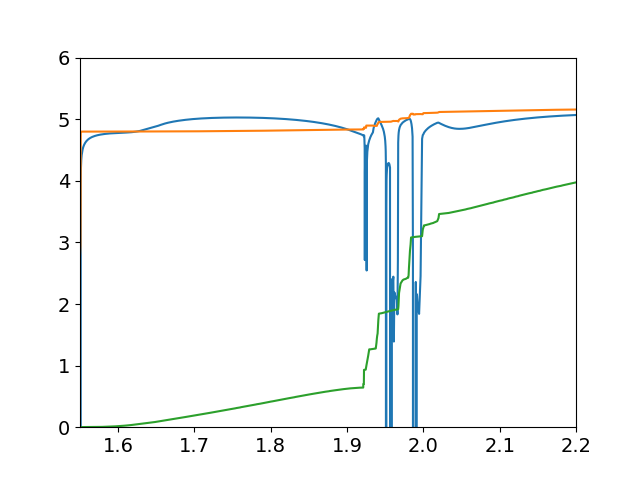

In [52]:
prof = ms.mesa_profile("/data/nugrid/data/set1ext/set1.2/see_wind/M15.0Z2.0e-02/LOGS", 9180)

entropy = prof.get("entropy")
logD    = prof.get("log_mlt_D_mix")
mass    = prof.get("mass")
c12     = prof.get("c12")


ifig=1;plt.close(ifig);plt.figure(ifig)

plt.plot(mass, logD - 10)
plt.plot(mass, entropy)
plt.plot(mass, c12*300)

plt.xlim(1.55,2.2)
plt.ylim(0,6)

In [42]:
pt.se.dcols

['mass', 'radius', 'rho', 'temperature', 'dcoeff', 'iso_massf']

 reading ['dcoeff']...100%

(1.6, 2.1)

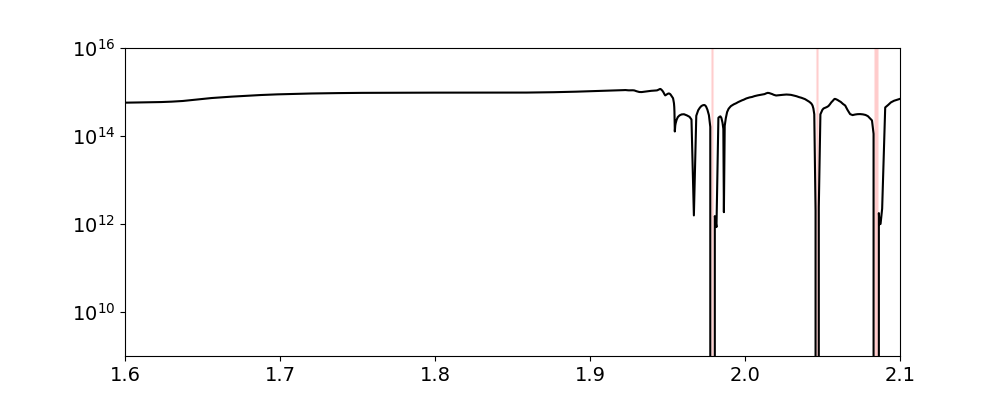

In [15]:
cycle = 9180

pt = stars["M15Z02"]['nugrid']

mass   = pt.get(cycle, "mass")
Dcoeff = pt.get(cycle, "dcoeff")

radiative_idx = np.where(Dcoeff == 0)[0]
mask = (mass[radiative_idx] >= 1.6) & (mass[radiative_idx] <= 2.1)
interested = radiative_idx[mask]

ifig=1;close(ifig);figure(ifig, figsize=(10,4))

plt.semilogy(mass, Dcoeff, color='black', zorder=2)

for interest in interested:
    plt.axvline(mass[interest], color='red', alpha=0.1, zorder=1)

plt.ylim(1e9, 1e16)
plt.xlim(1.6,2.1)

In [54]:
age = (stars['M15Z02']['mesa']).get('star_age')
mn = stars['M15Z02']['mesa'].get('model_number')

def mn_time(cycle):
    logtimeleft = np.log10(age[-1]-age)
    
    idx = np.argmin(np.abs(mn - cycle))
    
    return logtimeleft[idx]

mn_time(6200), mn_time(7200)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log10
  """


(-1.7652706275077972, -2.158392689127091)

In [6]:
from matplotlib.collections import PatchCollection, PolyCollection

In [7]:
points = {}

pt = stars["M15Z02"]['nugrid']
for cycle in range(8500, 9200+10, 10): 
    
    mass   = pt.get(cycle, "mass")
    Dcoeff = pt.get(cycle, "dcoeff")

    radiative_idx = Dcoeff == 0
    mask = (mass >= 1.6) & (mass <= 2)
    interested = mask * radiative_idx
    
    points[cycle] = interested

 reading ['dcoeff']...100%

In [8]:
toplottime = []
toplotmass1 = []
toplotmass2 = []

for cycle, indices in points.items():
    
    mass = pt.get(cycle, "mass")
    plttime = mn_time(cycle)
    
    toplottime.append(plttime)
    toplotmass1.append((mass[indices]-1.4)[0])
    toplotmass2.append((mass[indices]-1.4)[-1])

 reading ['mass']...100%

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log10
  """


 reading ['mass']...100%

 creating color map mix ...100% 

engenstyle was  full
mixstyle was  full

 finished preparing color map
plot versus time left
plotting contours
plotting patches


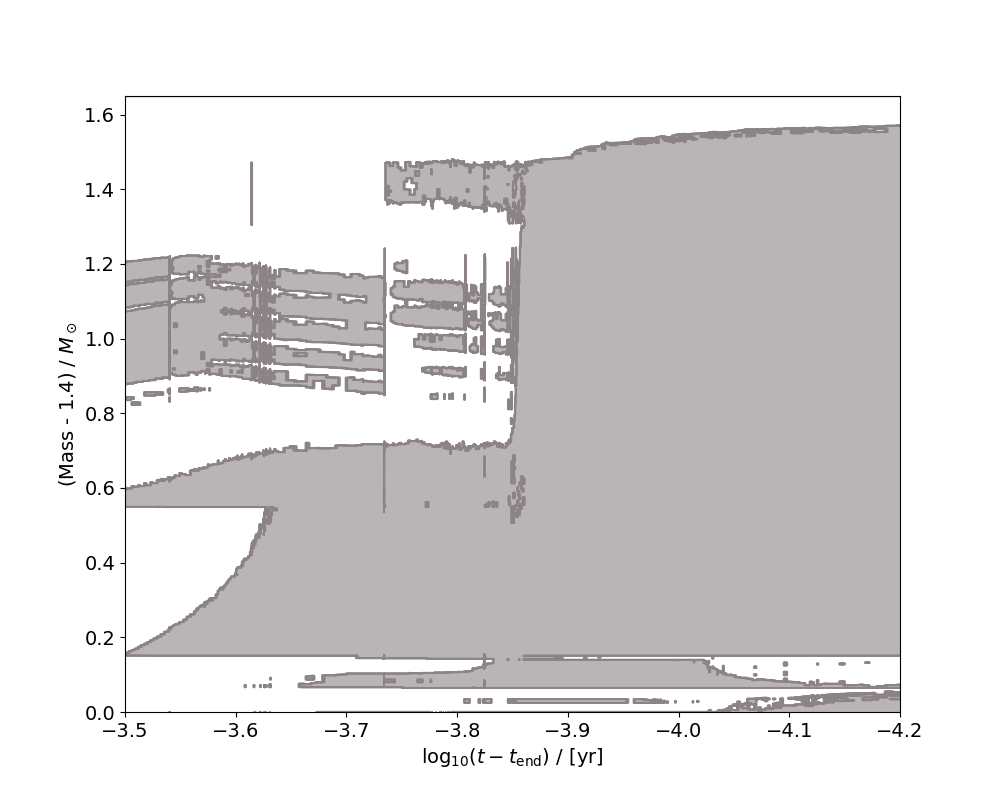

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log10
  """


In [12]:
ifig = 1; close(ifig); figure(ifig,figsize=(10,8))

stars['M15Z02']['mesa'].kip_cont(ifig, ylims=[1.4,3.05], ixaxis='log_time_left',xlims=[-3.5,-4.2],boundaries=False,engenPlus=False, xres=10000, yres=10000)

#for interest in interested:

#    plt.scatter(plttime, mass[interest] - 1.4, color='red', alpha=0.1, zorder=1)
"""
plt.fill_between(
    toplottime,
    toplotmass1,
    toplotmass2,
    color='red',
    alpha=0.3
)
"""
plt.plot(toplottime, toplotmass2,color='red')
plt.scatter(mn_time(9160), 0.4, edgecolor='black', facecolor='black', marker='<', s=300, zorder=10)
plt.scatter(mn_time(9160), 0.6, edgecolor='black', facecolor='white', marker='*', s=300, zorder=10)

#axvline(9160, color='red')
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.gca().xaxis.label.set_fontsize(25)
plt.gca().yaxis.label.set_fontsize(25)
for artist in plt.gca().get_children():
    if isinstance(artist, (plt.Line2D, PatchCollection, PolyCollection)):
        artist.set_rasterized(True)

plt.tight_layout()
plt.savefig("Kippenhahn_Ritter+2018.pdf", format="pdf", bbox_inches="tight", dpi=300)

In [43]:
from matplotlib.patches import Rectangle
from matplotlib.collections import PatchCollection, PolyCollection


 creating color map mix ...100% 

engenstyle was  full
mixstyle was  full

 finished preparing color map
plot versus time left
plotting contours
plotting patches


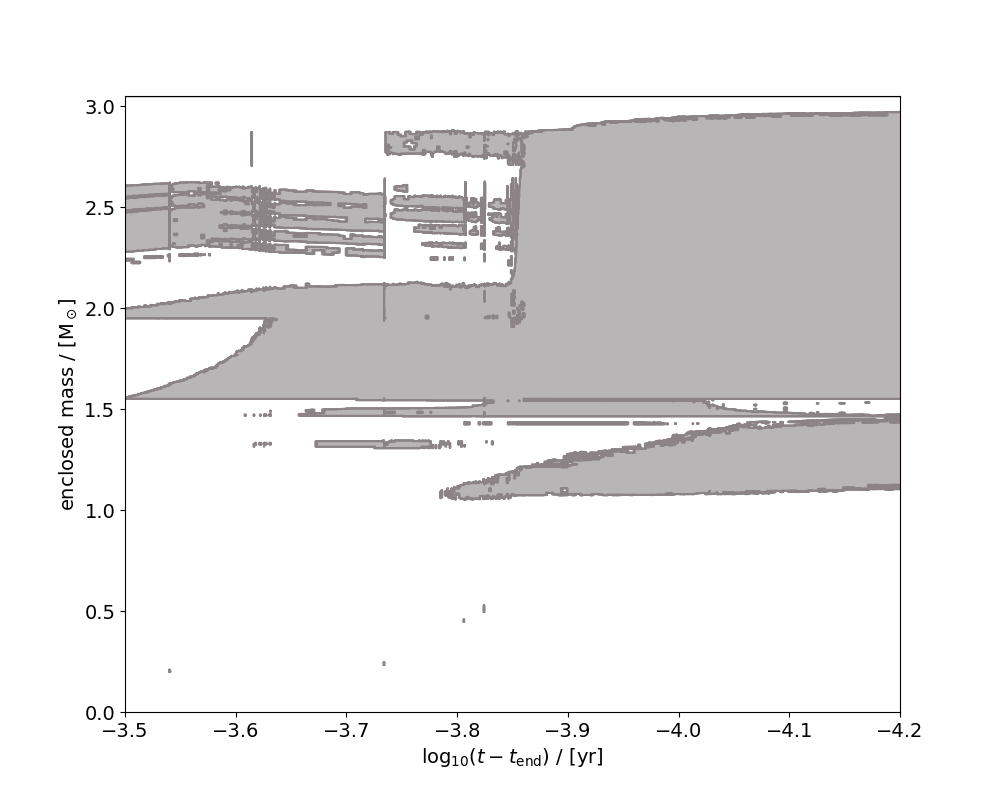

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log10
  """


In [8]:
ifig = 1; close(ifig); figure(ifig,figsize=(10,8))

stars['M15Z02']['mesa'].kip_cont(ifig, ylims=[0,3.05], ixaxis='log_time_left',xlims=[-3.5,-4.2],boundaries=False,engenPlus=False, xres=10000, yres=10000)

axvline(mn_time(9200), color='red')

# Add rectangle
ax = plt.gca()
rect = Rectangle(
    (-3.85, 1.55),   # (x0, y0)
    0.35,            # width  (–3.5 – (–3.85) = 0.35)
    0.4,            # height (2 – 1.55 = 0.45)
    linewidth=2,
    edgecolor='black',
    facecolor='none',
    zorder=100
)
ax.add_patch(rect)
rect2 = Rectangle(
    (-3.85, 1.95),   # (x0, y0)
    0.35,            # width  (–3.5 – (–3.85) = 0.35)
    1.05,            # height (2 – 1.55 = 0.45)
    linewidth=2,
    edgecolor='black',
    facecolor='none',
    zorder=100
)
ax.add_patch(rect2)

ax.text(
    -3.5 - 0.05,        # x: slightly inside
    1.55 + 0.4 - 0.02,   # y: top edge minus small offset
    "Convective O-shell", 
    fontsize=20,
    verticalalignment='top',
    horizontalalignment='left',
    zorder=200
)

# Add text to top left of second rectangle
ax.text(
    -3.5 - 0.05,
    1.95 + 1.05 - 0.02,
    "Convective C-shells", 
    fontsize=20,
    verticalalignment='top',
    horizontalalignment='left',
    zorder=200
)

ax.text(
    -3.5 - 0.05,
    1.95 + 1.05 - 0.02,
    "Convective C-shells", 
    fontsize=20,
    verticalalignment='top',
    horizontalalignment='left',
    zorder=200
)

ax.text(
    -3.9,
    1.2 + 1.05 - 0.02,
    "Merged O-C Shell", 
    fontsize=20,
    verticalalignment='top',
    horizontalalignment='left',
    zorder=200
)

plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.gca().xaxis.label.set_fontsize(25)
plt.gca().yaxis.label.set_fontsize(25)
for artist in plt.gca().get_children():
    if isinstance(artist, (plt.Line2D, PatchCollection, PolyCollection)):
        artist.set_rasterized(True)

plt.tight_layout()
plt.savefig("kippenhahn_merger.pdf", format="pdf", bbox_inches="tight", dpi=300)

423 in profiles.index file ...
Found and load nearest profile for cycle 8400
reading profile/data/nugrid/data/set1ext/set1.2/see_wind/M15.0Z2.0e-02/LOGS/log177.data ...
 reading ...100% 

 reading ['radius']...100%00%
Assuming a 896^3 grid with 9 Mm radius
O-shell: 94 cells
Inter-shell: 91 cells
C-shell: 103 cells
Closing profile tool ...


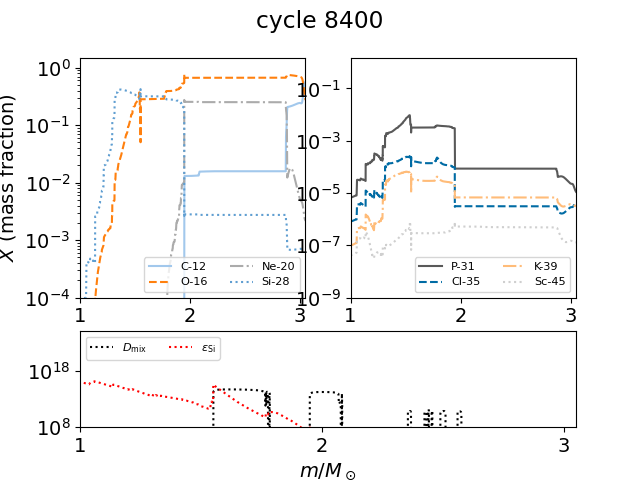

In [37]:
# during: 9160-11480
plotting('M15Z02', 8400,  6, [1,3.05])
#plotting('M15Z02', 9600,  7, [1,3.05])
#plotting('M15Z02', 15000, 8, [1,3.05])

### $M_{\mathrm{ZAMS}} = 12 M_\odot$ and $Z = 0.01$

Interestingly, the Kippenhahn is less clear on the growth of the convective O-shell as all of the other mergers.

 creating color map burn ...100% 

 creating color map mix ...100% 

engenstyle was  full
mixstyle was  full

 finished preparing color map
plot versus model number
plotting contours


/usr/local/lib/python3.6/dist-packages/nugridpy/mesa.py:2509: UserWarning: Log scale: values of z <= 0 have been masked
  locator=matplotlib.ticker.LogLocator())
/usr/local/lib/python3.6/dist-packages/nugridpy/mesa.py:2512: UserWarning: Log scale: values of z <= 0 have been masked
  locator=matplotlib.ticker.LogLocator())


plotting patches
plotting abund boundaries


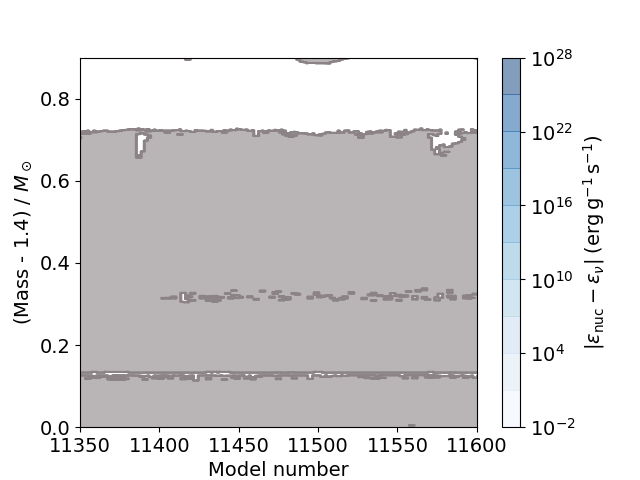

In [4]:
ifig = 2; close(ifig); figure(ifig)

stars['M12Z01']['mesa'].kip_cont(ifig, ylims=[1.4,2.3], xlims=[11350, 11600], xres=7000, yres=7000)

axvline(11420, color='red')

407 in profiles.index file ...
Found and load nearest profile for cycle 11400
reading profile/data/ASDR/NuGrid/data/set1ext/set1.1/see_wind/M12.0Z1.0e-02/LOGS/log237.data ...
 reading ...100% 

 reading ['iso_massf']...100%Closing profile tool ...
407 in profiles.index file ...
Found and load nearest profile for cycle 13000
reading profile/data/ASDR/NuGrid/data/set1ext/set1.1/see_wind/M12.0Z1.0e-02/LOGS/log269.data ...
 reading ...100% 

 reading ['iso_massf']...100%Closing profile tool ...
407 in profiles.index file ...
Found and load nearest profile for cycle 16000
reading profile/data/ASDR/NuGrid/data/set1ext/set1.1/see_wind/M12.0Z1.0e-02/LOGS/log329.data ...
 reading ...100% 

 reading ['iso_massf']...100%Closing profile tool ...


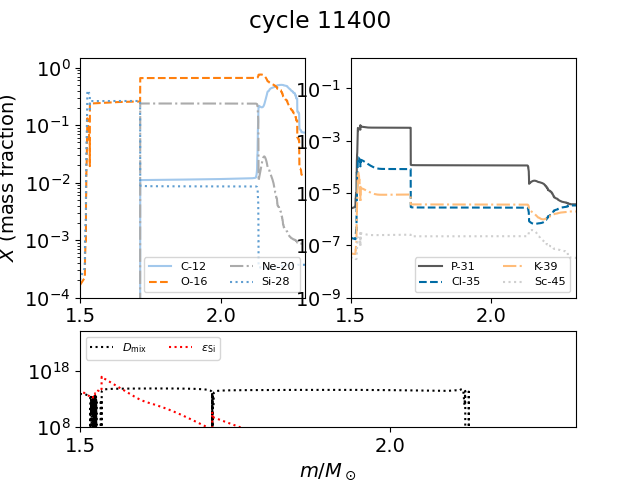

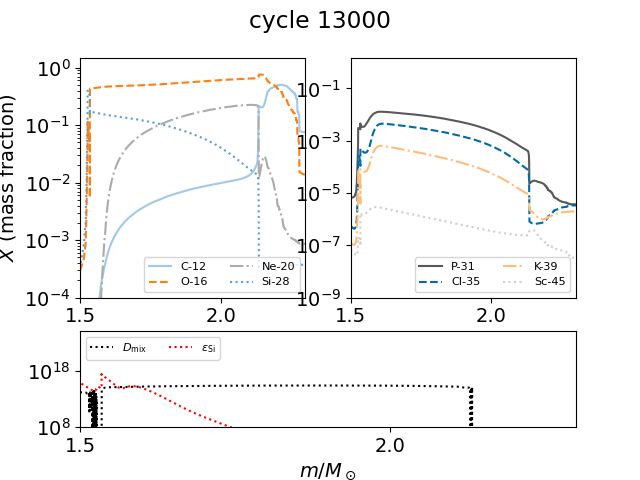

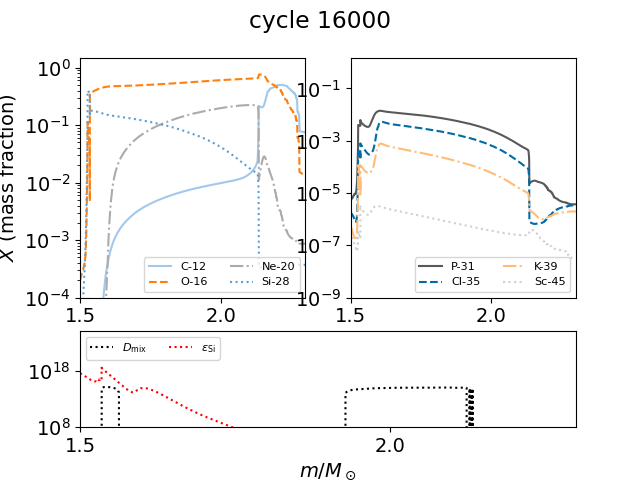

In [9]:
# during: 11420-15000
plotting('M12Z01', 11400, 12, [1.5,2.3])
plotting('M12Z01', 13000, 13, [1.5,2.3])
plotting('M12Z01', 16000, 14, [1.5,2.3])

### $M_{\mathrm{ZAMS}} = 15 M_\odot$ and $Z = 0.01$

In [ ]:
ifig = 3; close(ifig); figure(ifig)

stars['M15Z01']['mesa'].kip_cont(ifig, ylims=[1.5,3], xlims=[8800, 9200], xres=7000, yres=7000)

axvline(8900, color='red')

369 in profiles.index file ...
Found and load nearest profile for cycle 8800
reading profile/data/ASDR/NuGrid/data/set1ext/set1.1/see_wind/M15.0Z1.0e-02/LOGS/log185.data ...
 reading ...100% 

 reading ['iso_massf']...100%Closing profile tool ...
369 in profiles.index file ...
Found and load nearest profile for cycle 9400
reading profile/data/ASDR/NuGrid/data/set1ext/set1.1/see_wind/M15.0Z1.0e-02/LOGS/log197.data ...
 reading ...100% 

 reading ['iso_massf']...100%Closing profile tool ...
369 in profiles.index file ...
Found and load nearest profile for cycle 12500
reading profile/data/ASDR/NuGrid/data/set1ext/set1.1/see_wind/M15.0Z1.0e-02/LOGS/log259.data ...
 reading ...100% 

 reading ['iso_massf']...100%Closing profile tool ...


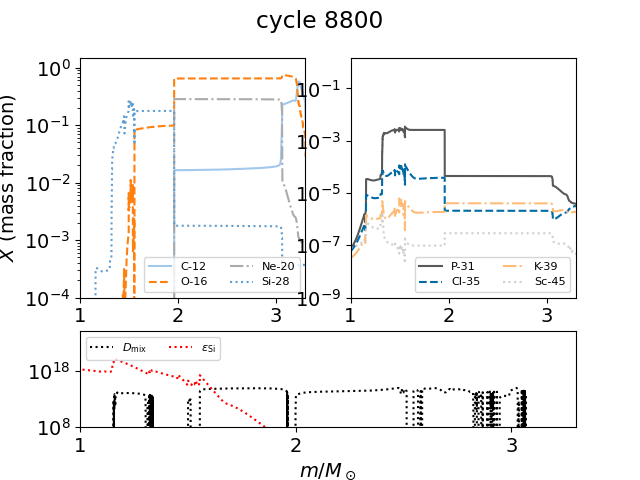

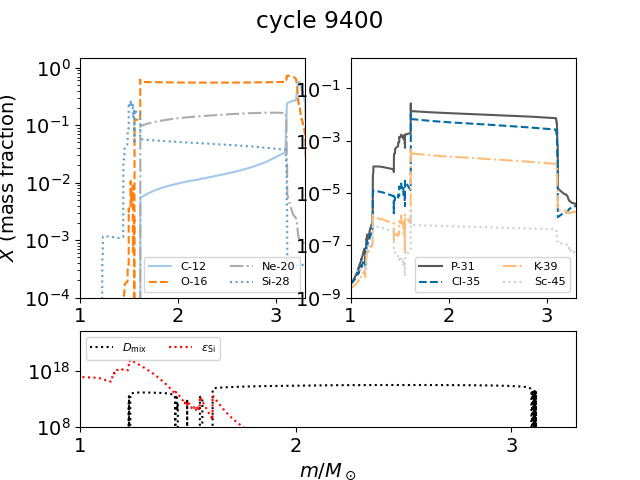

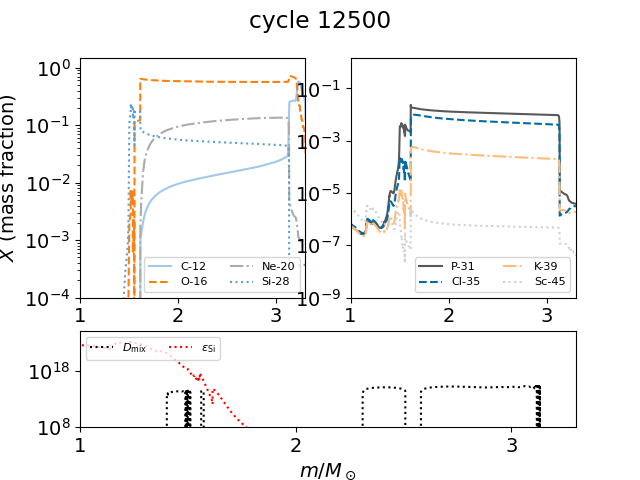

In [10]:
# during: 8900-11440
plotting('M15Z01', 8800,  15, [1,3.3])
plotting('M15Z01', 9400,  16, [1,3.3])
plotting('M15Z01', 12500, 17, [1,3.3])

### $M_{\mathrm{ZAMS}} = 20 M_\odot$ and $Z = 0.01$

In [ ]:
ifig = 4; close(ifig); figure(ifig)

stars['M20Z01']['mesa'].kip_cont(ifig, ylims=[2,3], xlims=[11500, 12500], xres=3000, yres=3000)

axvline(11900, color='red')

392 in profiles.index file ...
Found and load nearest profile for cycle 11500
reading profile/data/ASDR/NuGrid/data/set1ext/set1.1/see_wind/M20.0Z1.0e-02/LOGS/log239.data ...
 reading ...100% 

 reading ['iso_massf']...100%Closing profile tool ...
392 in profiles.index file ...
Found and load nearest profile for cycle 13000
reading profile/data/ASDR/NuGrid/data/set1ext/set1.1/see_wind/M20.0Z1.0e-02/LOGS/log269.data ...
 reading ...100% 

 reading ['iso_massf']...100%Closing profile tool ...
392 in profiles.index file ...
Found and load nearest profile for cycle 16000
reading profile/data/ASDR/NuGrid/data/set1ext/set1.1/see_wind/M20.0Z1.0e-02/LOGS/log329.data ...
 reading ...100% 

 reading ['iso_massf']...100%Closing profile tool ...


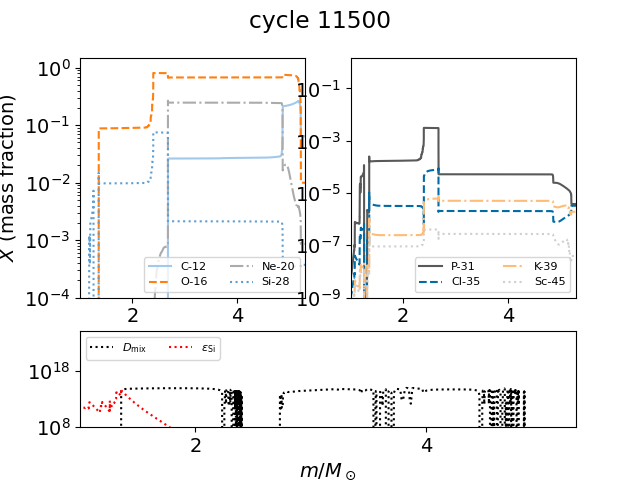

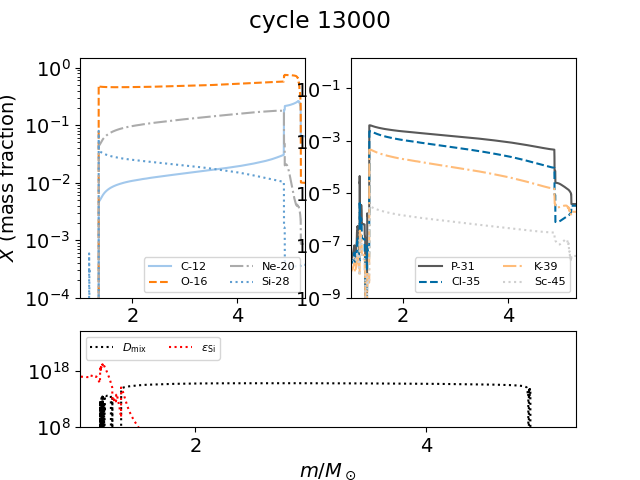

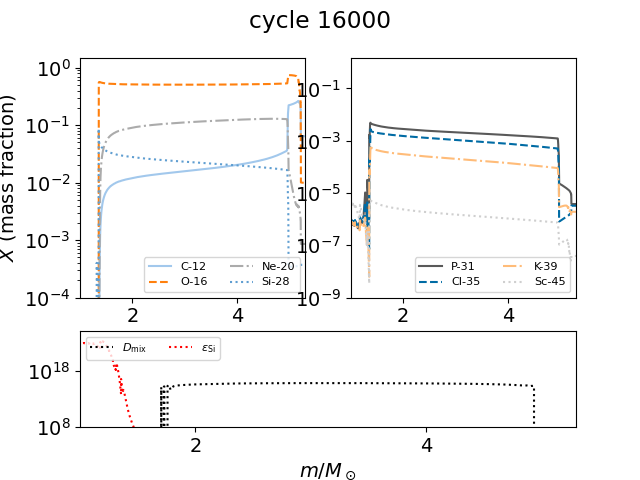

In [11]:
# during: 11900/12180-14860
plotting('M20Z01', 11500, 18, [1,5.3])
plotting('M20Z01', 13000, 19, [1,5.3])
plotting('M20Z01', 16000, 20, [1,5.3])